In [1]:
import pandas as pd

In [2]:
taiex = pd.read_csv('taiex.csv')

In [3]:
Close=taiex.Close
Close.head(3)

0    8612.54
1    8546.54
2    8500.01
Name: Close, dtype: float64

In [4]:
Close.index=pd.to_datetime(taiex.Date) #todatetime認定為時間序列
Close.head(10)

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
2014-01-09    8514.68
2014-01-10    8529.35
2014-01-13    8566.20
2014-01-14    8548.14
2014-01-15    8602.55
Name: Close, dtype: float64

<Axes: xlabel='Date'>

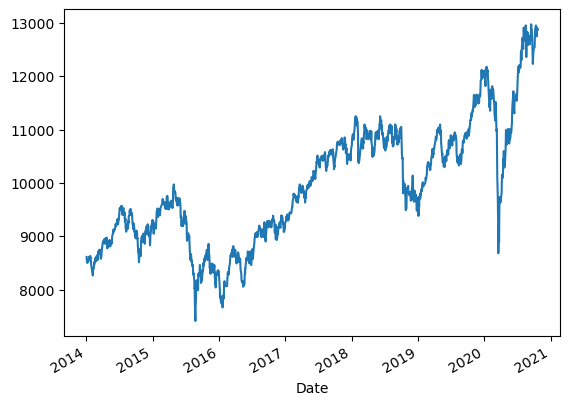

In [5]:
#畫圖
import matplotlib.pyplot as plt
Close.plot()

In [6]:
#選擇特定時間點的股價
ClosePart1=Close["2015-01-01":"2015-12-31"]
ClosePart1

Date
2015-01-05    9274.11
2015-01-06    9048.34
2015-01-07    9080.09
2015-01-08    9238.03
2015-01-09    9215.58
               ...   
2015-12-25    8363.28
2015-12-28    8358.49
2015-12-29    8293.91
2015-12-30    8279.99
2015-12-31    8338.06
Name: Close, Length: 244, dtype: float64

In [7]:
#基本統計量
Close.describe()

count     1665.000000
mean      9945.331063
std       1150.410135
min       7410.340000
25%       9045.980000
50%       9797.090000
75%      10788.510000
max      12976.760000
Name: Close, dtype: float64

In [8]:
#計算報酬率
#shift(1)表示前一期
taiexRet=(Close-Close.shift(1))/Close.shift(1)
taiexRet

Date
2014-01-02         NaN
2014-01-03   -0.007663
2014-01-06   -0.005444
2014-01-07    0.001446
2014-01-08    0.005135
                ...   
2020-10-15   -0.007082
2020-10-16   -0.006038
2020-10-19    0.012389
2020-10-20   -0.003561
2020-10-21    0.001157
Name: Close, Length: 1665, dtype: float64

<Axes: xlabel='Date'>

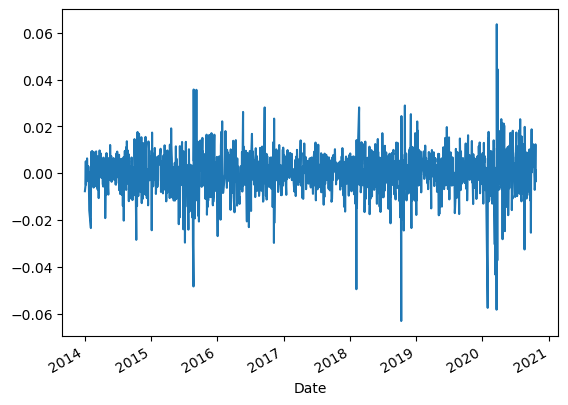

In [9]:
#看平均數是否穩定
taiexRet.plot()

In [10]:
#計算自相關係數ACF
from statsmodels.tsa import stattools

In [11]:
acfs=stattools.acf(Close)
acfs

array([1.        , 0.99462818, 0.98921491, 0.98326363, 0.97734054,
       0.97138797, 0.96552183, 0.95963524, 0.95366561, 0.94773402,
       0.94217351, 0.93676969, 0.931398  , 0.92629245, 0.92105683,
       0.91598094, 0.91096472, 0.90596459, 0.90075948, 0.89520102,
       0.88948156, 0.88369861, 0.8779351 , 0.8721146 , 0.86632055,
       0.86066017, 0.85535693, 0.85005062, 0.84503836, 0.84023272,
       0.83523512, 0.82997265, 0.82448263])

In [12]:
#用星星表示下載全部模組的套件
from statsmodels.graphics.tsaplots import *

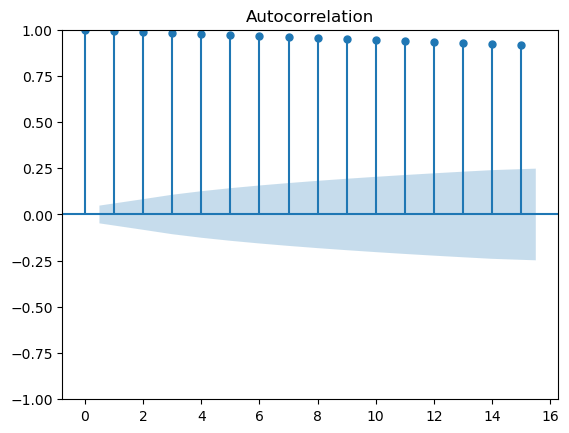

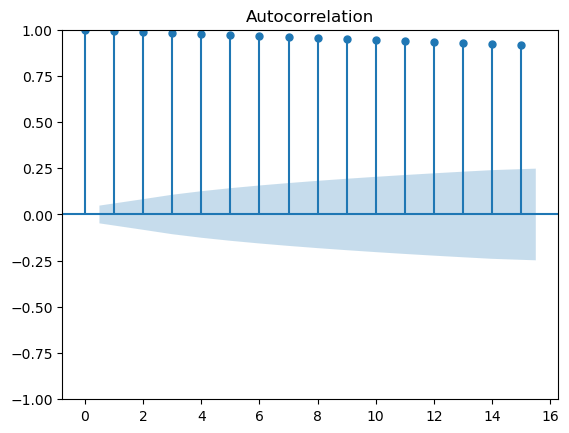

In [13]:
#結果表示不穩定因為容易受間接效果影響
plot_acf(Close,lags=15)

In [14]:
taiexRet=taiexRet.dropna()
taiexRet

Date
2014-01-03   -0.007663
2014-01-06   -0.005444
2014-01-07    0.001446
2014-01-08    0.005135
2014-01-09   -0.004831
                ...   
2020-10-15   -0.007082
2020-10-16   -0.006038
2020-10-19    0.012389
2020-10-20   -0.003561
2020-10-21    0.001157
Name: Close, Length: 1664, dtype: float64

In [15]:
acf_ret=stattools.acf(taiexRet)
acf_ret

array([ 1.        , -0.00145094,  0.07182076,  0.0350672 , -0.01969735,
       -0.0453634 , -0.01325262,  0.01899992,  0.01579524, -0.02140429,
       -0.01258452,  0.02316697, -0.0430115 ,  0.01741765, -0.02197829,
        0.03143036, -0.00985026, -0.04852338,  0.02739491, -0.01675118,
        0.00797097, -0.00382073, -0.00218877,  0.032079  , -0.00677273,
       -0.03272572, -0.01180819, -0.02498069, -0.04203166,  0.02685647,
        0.03644388,  0.01500363,  0.0239564 ])

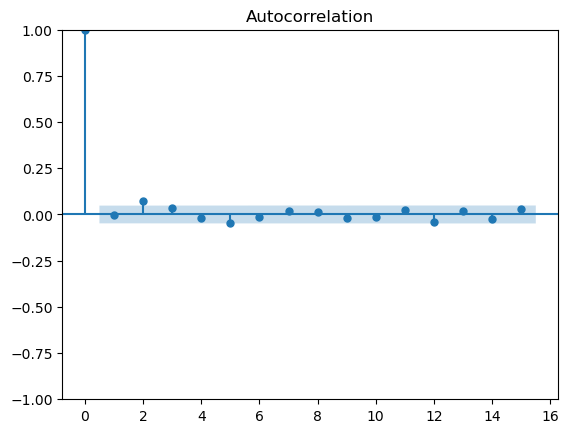

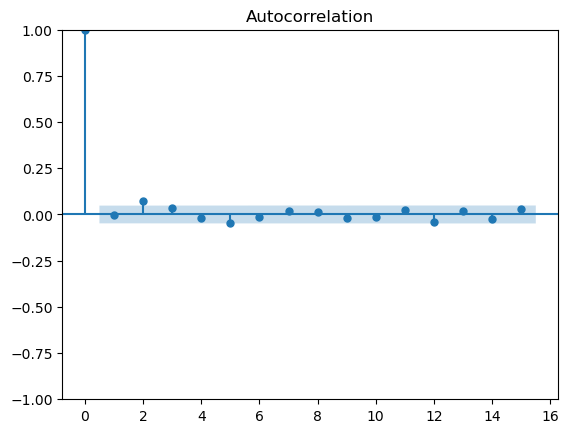

In [16]:
plot_acf(taiexRet,lags=15)

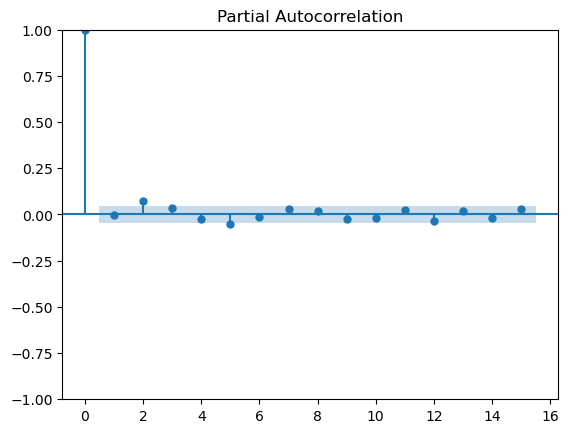

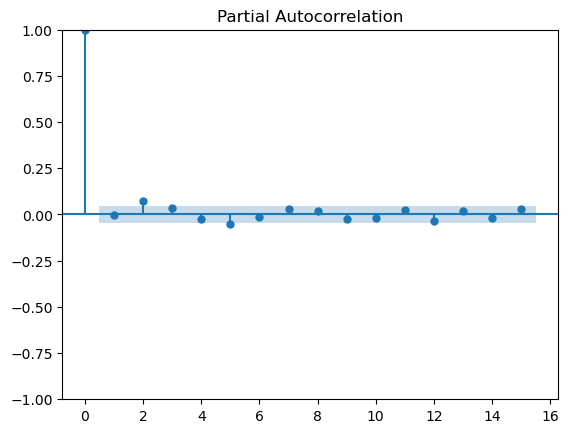

In [17]:
plot_pacf(taiexRet,lags=15)

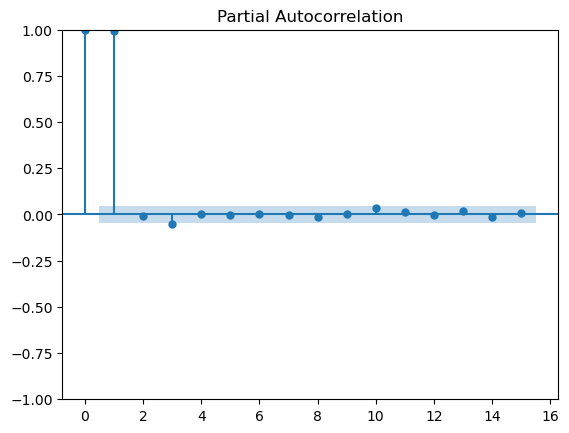

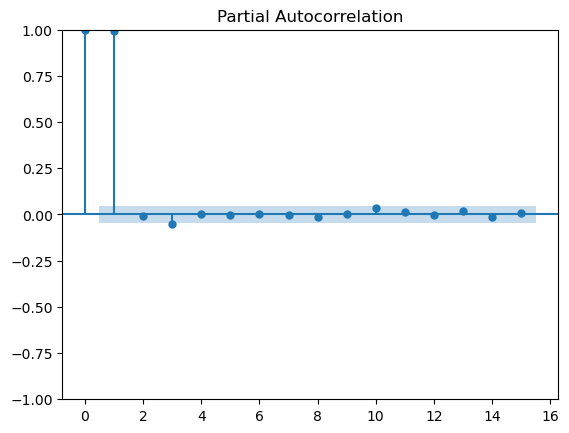

In [18]:
plot_pacf(Close,lags=15)

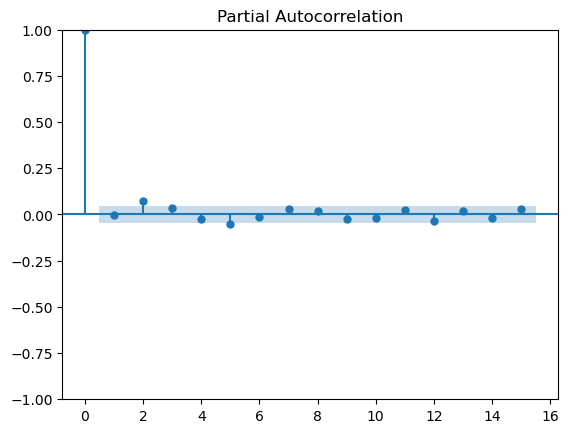

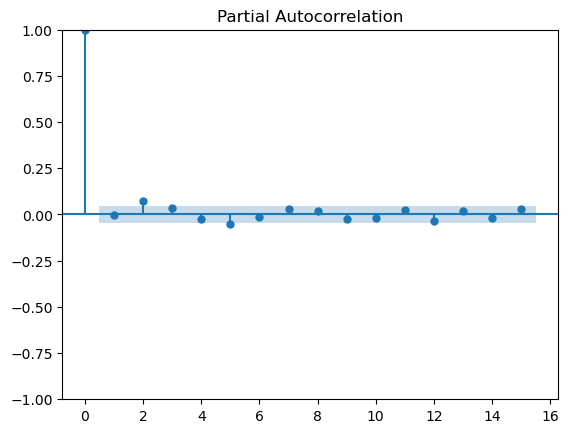

In [19]:
plot_pacf(taiexRet,lags=15)

In [20]:
pacf_ret=stattools.pacf(taiexRet)
pacf_ret

array([ 1.        , -0.00145181,  0.07190523,  0.03551552, -0.02489012,
       -0.05109317, -0.01176726,  0.02800503,  0.02128673, -0.02636277,
       -0.02071628,  0.0254496 , -0.03606592,  0.0163887 , -0.02139222,
        0.03056267, -0.0069066 , -0.05391028,  0.02521278, -0.00842509,
        0.01222489, -0.00748203, -0.00897486,  0.03498984, -0.00473683,
       -0.03479405, -0.02135351, -0.01566683, -0.03467858,  0.02740222,
        0.04291096,  0.00619703,  0.02136442])

In [21]:
pacf_Close=stattools.pacf(Close)
pacf_Close

array([ 1.00000000e+00,  9.95225909e-01, -7.35178446e-03, -5.95931030e-02,
        1.23956094e-04, -3.25800435e-03,  5.45744737e-03, -5.35332126e-03,
       -1.31124497e-02,  1.01877195e-03,  3.69469817e-02,  1.27042742e-02,
       -4.31653042e-03,  2.33701174e-02, -1.70706176e-02,  1.17440143e-02,
        5.02555612e-03, -4.13869756e-03, -2.50933514e-02, -3.94636537e-02,
       -1.67972925e-02, -5.15303549e-03,  1.99817941e-03, -9.81228291e-03,
       -6.66792166e-04,  1.37717474e-02,  3.49107643e-02, -5.74454122e-03,
        2.06053390e-02,  1.71008326e-02, -2.84932240e-02, -3.45154116e-02,
       -2.67019262e-02])

In [22]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
resultret=adfuller(taiexRet)
resultret

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示拒絕HO，所以為定態
print('ADF Statistic: %f' % resultret[0])
print('p-value: %f' % resultret[1])
for key , value in resultret[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -18.537664
p-value: 0.000000
	1%: -3.434298
	5%: -2.863284
	10%: -2.567698


In [23]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
resultClose=adfuller(Close)
resultClose

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示無法拒絕HO，所以不為定態，有單根
print('ADF Statistic: %f' % resultClose[0])
print('p-value: %f' % resultClose[1])
for key , value in resultClose[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -0.999793
p-value: 0.753340
	1%: -3.434291
	5%: -2.863281
	10%: -2.567697


In [24]:
#檢測隨機漫步 LB test
#結果表示拒絕H0，為隨機漫步
#只顯示最後一個 p-value
LungBox_ret=stattools.q_stat(stattools.acf(taiexRet),len(taiexRet))
LungBox_ret[1][-1]

0.0

In [25]:
#ARMA模型(p,幾階差分,q)
from statsmodels.tsa.arima.model import ARIMA

In [26]:
#先嘗試MA模型 MA(2)
#先設定模型參數然後再跑
#結果表示第二期顯著
#BIC和BIC值愈小愈好
model1=ARIMA(taiexRet,order=(0,0,2)).fit()
model1.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(0, 0, 2)   Log Likelihood                5479.961
Date:                Wed, 16 Oct 2024   AIC                         -10951.922
Time:                        09:44:35   BIC                         -10930.254
Sample:                             0   HQIC                        -10943.891
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.105      0.269      -0.000       0.001
ma.L1         -0.0043      0.013     -0.326      0.744      -0.030       0.021
ma.L2          0.0756      0.015      5.095      0.000       0.047       0.105
sigma2      8.067e-05   1.35e-06     59.648      0.000     7.8e-05    8.33e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3800.09
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
#再嘗試MA模型 MA(1)
#先設定模型參數然後再跑
#結果表示第一期不顯著
model2=ARIMA(taiexRet,order=(0,0,1)).fit()
model2.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(0, 0, 1)   Log Likelihood                5475.425
Date:                Wed, 16 Oct 2024   AIC                         -10944.849
Time:                        09:44:35   BIC                         -10928.598
Sample:                             0   HQIC                        -10938.826
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.189      0.235      -0.000       0.001
ma.L1         -0.0042      0.012     -0.339      0.734      -0.028       0.020
sigma2      8.108e-05   1.35e-06     60.122      0.000    7.84e-05    8.37e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3933.06
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
#再嘗試AR模型 AR(2)
#先設定模型參數然後再跑
#結果表示第二期顯著
model3=ARIMA(taiexRet,order=(2,0,0)).fit()
model3.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(2, 0, 0)   Log Likelihood                5479.734
Date:                Wed, 16 Oct 2024   AIC                         -10951.468
Time:                        09:44:36   BIC                         -10929.800
Sample:                             0   HQIC                        -10943.438
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.095      0.273      -0.000       0.001
ar.L1         -0.0017      0.012     -0.137      0.891      -0.026       0.023
ar.L2          0.0718      0.014      5.038      0.000       0.044       0.100
sigma2      8.075e-05   1.35e-06     59.996      0.000    7.81e-05    8.34e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3815.33
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
#再嘗試AR模型 AR(1)
#先設定模型參數然後再跑
#結果表示第一期不顯著
model4=ARIMA(taiexRet,order=(1,0,0)).fit()
model4.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(1, 0, 0)   Log Likelihood                5475.433
Date:                Wed, 16 Oct 2024   AIC                         -10944.867
Time:                        09:44:36   BIC                         -10928.616
Sample:                             0   HQIC                        -10938.844
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.193      0.233      -0.000       0.001
ar.L1         -0.0015      0.012     -0.118      0.906      -0.025       0.023
sigma2      8.117e-05   1.35e-06     60.042      0.000    7.85e-05    8.38e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3938.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#再嘗試ARMA模型 ARMA(1,1)
#先設定模型參數然後再跑
#結果表示第一期不顯著
model5=ARIMA(taiexRet,order=(1,0,1)).fit()
model5.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5475.166
Date:                Wed, 16 Oct 2024   AIC                         -10942.332
Time:                        09:44:36   BIC                         -10920.664
Sample:                             0   HQIC                        -10934.301
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.148      0.251      -0.000       0.001
ar.L1          0.4650      2.201      0.211      0.833      -3.850       4.780
ma.L1         -0.4692      2.192     -0.214      0.831      -4.766       3.828
sigma2      8.118e-05   1.35e-06     60.152      0.000    7.85e-05    8.38e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3939.80
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#再嘗試ARMA模型 ARMA(2,2)
#先設定模型參數然後再跑
#結果表示第一期不顯著
model6=ARIMA(taiexRet,order=(2,0,2)).fit()
model6.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1664
Model:                 ARIMA(2, 0, 2)   Log Likelihood                5484.153
Date:                Wed, 16 Oct 2024   AIC                         -10956.306
Time:                        09:44:36   BIC                         -10923.804
Sample:                             0   HQIC                        -10944.261
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.094      0.274      -0.000       0.001
ar.L1          0.5412      0.128      4.240      0.000       0.291       0.791
ar.L2         -0.5238      0.122     -4.301      0.000      -0.763      -0.285
ma.L1         -0.5448      0.124     -4.406      0.000      -0.787      -0.302
ma.L2          0.6012      0.117      5.155      0.000       0.373       0.830
sigma2      8.024e-05   1.41e-06     56.961      0.000    7.75e-05     8.3e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3714.97
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
#最後選擇MA(2)或ARMA(1,1)
#檢查ARMA(1,1)殘差，做殘差檢定
#計算標準化殘差
import math
import numpy as np
stdresid=model6.resid/math.sqrt(np.var(model6.resid))
stdresid

Date
2014-01-03   -0.886097
2014-01-06   -0.639000
2014-01-07    0.193405
2014-01-08    0.622897
2014-01-09   -0.572220
                ...   
2020-10-15   -0.767116
2020-10-16   -0.630671
2020-10-19    1.420117
2020-10-20   -0.376036
2020-10-21   -0.020912
Length: 1664, dtype: float64

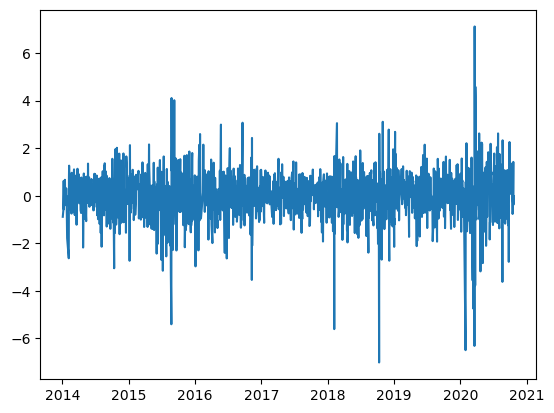

In [33]:
#結果看起來為隨機，不過需要作檢定
plt.plot(stdresid)

In [34]:
#檢測隨機漫步 LB test
#結果表示拒絕H0，為隨機漫步
#只顯示最後一個 p-value
#檢測殘差
#p值很小所以具有隨機性
LungBox_ret=stattools.q_stat(stattools.acf(stdresid),len(stdresid))
LungBox_ret[1][-1]

0.0

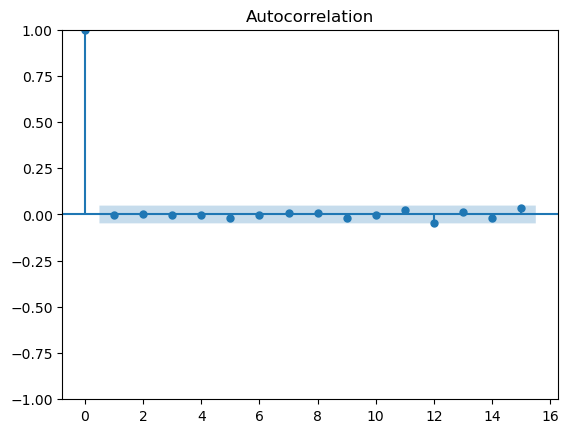

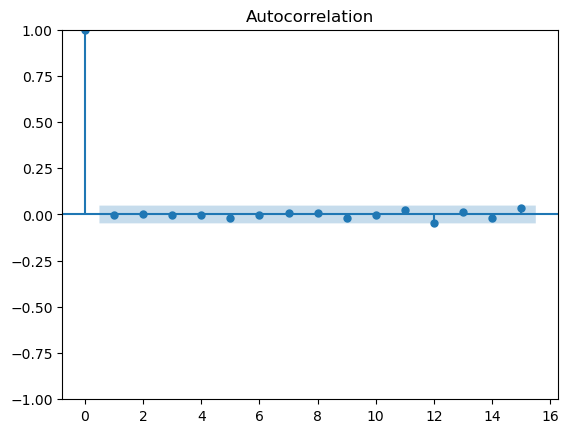

In [35]:
#圖形表示穩定
plot_acf(stdresid,lags=15)

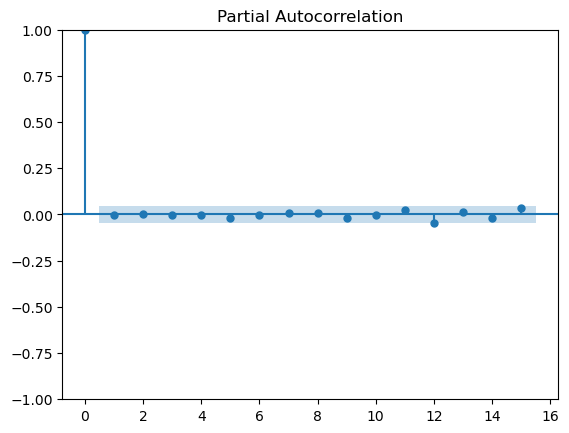

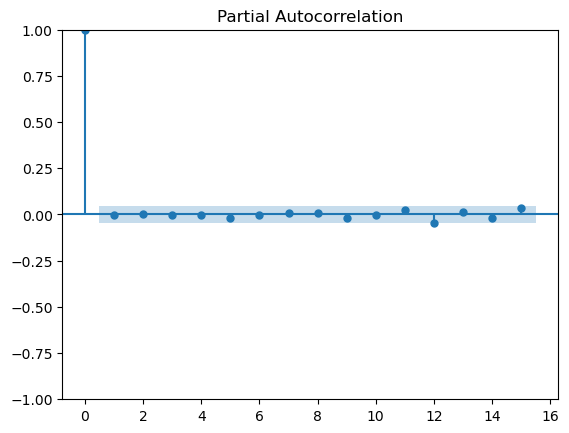

In [36]:
#用pacf相對acf更穩定
plot_pacf(stdresid,lags=15)

In [37]:
model6.forecast(5)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1664    0.000841
1665    0.000010
1666   -0.000162
1667    0.000181
1668    0.000456
Name: predicted_mean, dtype: float64

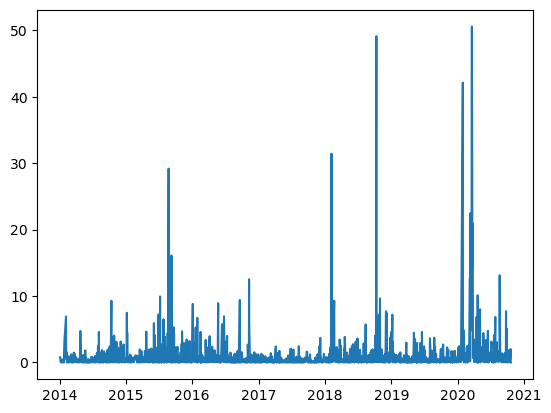

In [39]:
#兩顆星星表示平方
plt.plot(stdresid**2)

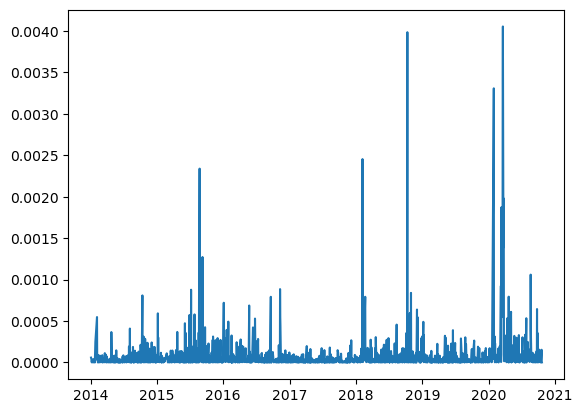

In [40]:
plt.plot(taiexRet**2)

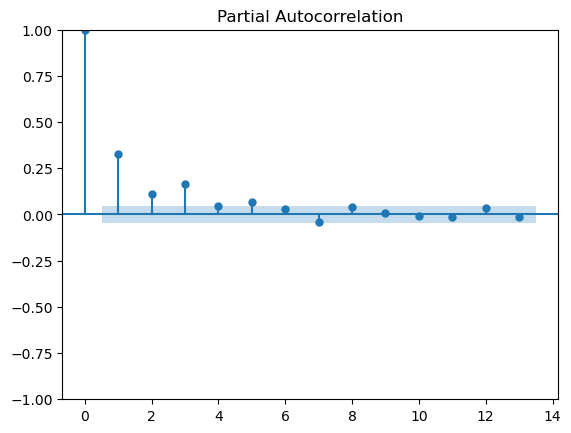

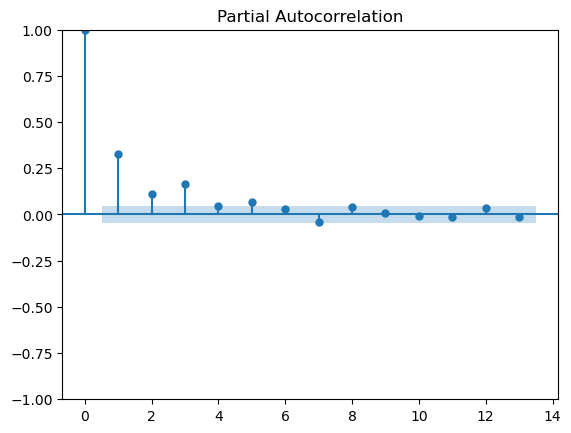

In [42]:
#可以嘗試到lag5，但是一般不會那麼多，所以從比較少開始試
plot_pacf(stdresid**2,lags=13)

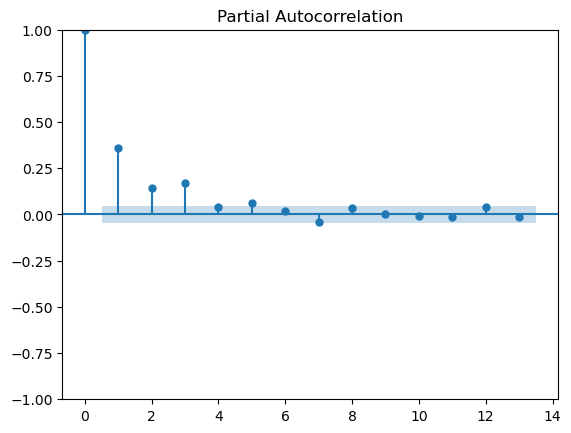

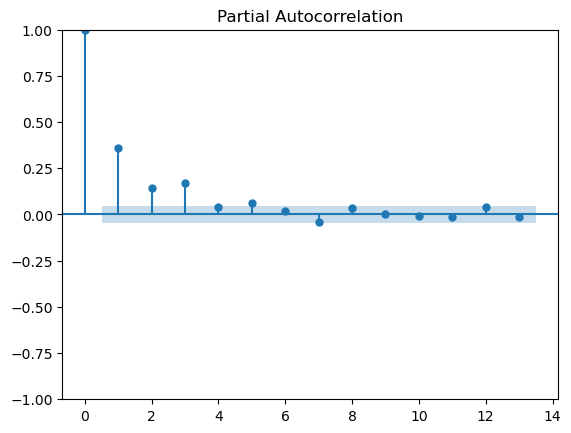

In [44]:
#用兩個的結果差不多，所以都可以
plot_pacf(taiexRet**2,lags=13)

In [45]:
from arch import arch_model

In [49]:
#嘗試GARCH(p=1,q=1)
#先設定超參數存在am
#summary 才會讓結果漂亮
#結果表示有顯著，alpha和 beta是garch模型的係數
#如果AIC和BIC沒有差太多，就不用用到太大
am=arch_model(taiexRet,p=1,q=1)
garch_model=am.fit(update_freq=0)
print(garch_model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5620.726452508168
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5620.73
Distribution:                  Normal   AIC:                          -11233.5
Method:            Maximum Likelihood   BIC:                          -11211.8
                                        No. Observations:                 1664
Date:                Wed, Oct 16 2024   Df Residuals:                     1663
Time:                        10:12:59   Df Model:                            1
                                 Mean Model                                 
    

C:\Users\User\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.117e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [52]:
#結果不顯著，表示不用用到GARCH(2,2)
am2=arch_model(taiexRet,p=2,q=2)
garch_model2=am2.fit(update_freq=0)
print(garch_model2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5625.024281926547
            Iterations: 3
            Function evaluations: 31
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5625.02
Distribution:                  Normal   AIC:                          -11238.0
Method:            Maximum Likelihood   BIC:                          -11205.5
                                        No. Observations:                 1664
Date:                Wed, Oct 16 2024   Df Residuals:                     1663
Time:                        10:15:14   Df Model:                            1
                                 Mean Model                                 
    

C:\Users\User\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.117e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
